# Classification

Dataset description: We picked this dataset from Kaggle UCI Machine Learning. This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

This Dataset contains 32561 rows and 15 features, among which income is our target variable.
Link for Dataset reference: https://www.kaggle.com/uciml/adult-census-income#adult.csv

Feature Description:

1. age              :  Age of the person
2. workclass        :  Workclass category person belongs to
3. fnlwgt           :  Value assigned on basis of similarity of demographic
4. education        :  Highest level of education completed by the person
5. education.num    :  Class number for the highest level of education
6. marital.status   :  Marital status of the person 
7. occupation       :  Occupation of the person
8. relationship     :  Relationship of the person
9. race             :  Race that person belongs to
10. sex             :  Sex of the person
11. capital.gain    :  Capital gain associated with that particular record
12. capital.loss    :  Capital loss associated with that particular record
13. hours.per.week  :  Weekly hours person works
14. native.country  :  Native country of the person
15. income          :  Income class of the person (>50K or <=50K)

# Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv(os.path.expanduser("~/Downloads/adult.csv"))
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [3]:
# Checking total no. of rows and columns in dataframe and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#Statistical Summary of all the Numeric features:
df.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [5]:
#Statistical Summary of all the features:
df.describe(include="all")

age workclass        fnlwgt education  education.num  \
count   32561.000000     32561  3.256100e+04     32561   32561.000000   
unique           NaN         9           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500e+04       NaN       1.000000   
25%        28.000000       NaN  1.178270e+05       NaN       9.000000   
50%        37.000000       NaN  1.783560e+05       NaN      10.000000   
75%        48.000000       NaN  2.370510e+05       NaN      12.000000   
max        90.000000       NaN  1.484705e+06       NaN      16.000000   

            marital.status      occupation relationship   race    sex  \
count                32561           32561        32561  32561  32561   
unique                   7              15            6      5      2   
top     Married-civ-spouse  Prof-specialty      Husband  White   Male   
freq                 14976            4140        13193  27816  21790   
mean                   NaN             NaN          NaN    NaN    NaN   
std                    NaN             NaN          NaN    NaN    NaN   
min                    NaN             NaN          NaN    NaN    NaN   
25%                    NaN             NaN          NaN    NaN    NaN   
50%                    NaN             NaN          NaN    NaN    NaN   
75%                    NaN             NaN          NaN    NaN    NaN   
max                    NaN             NaN          NaN    NaN    NaN   

        capital.gain  capital.loss  hours.per.week native.country income  
count   32561.000000  32561.000000    32561.000000          32561  32561  
unique           NaN           NaN             NaN             42      2  
top              NaN           NaN             NaN  United-States  <=50K  
freq             NaN           NaN             NaN          29170  24720  
mean     1077.648844     87.303830       40.437456            NaN    NaN  
std      7385.292085    402.960219       12.347429            NaN    NaN  
min         0.000000      0.000000        1.000000            NaN    NaN  
25%         0.000000      0.000000       40.000000            NaN    NaN  
50%         0.000000      0.000000       40.000000            NaN    NaN  
75%         0.000000      0.000000       45.000000            NaN    NaN  
max     99999.000000   4356.000000       99.000000            NaN    NaN

In [6]:
#Checking for Null values:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
# All the features in our dataframe shows 0 null values because '?' 
# has been substitued in our initial csv instead of null/nan
# so we will replace ? with nan
df = df.replace('?', np.nan)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
#Since nulls are present only in features - workclass, occupation and native.country 
#We replace the nulls with 'Unknown-Category' for Exploratory Data Analysis
df = df.replace(np.nan,'Unknown-Category')
df.head()

age         workclass  fnlwgt     education  education.num marital.status  \
0   90  Unknown-Category   77053       HS-grad              9        Widowed   
1   82           Private  132870       HS-grad              9        Widowed   
2   66  Unknown-Category  186061  Some-college             10        Widowed   
3   54           Private  140359       7th-8th              4       Divorced   
4   41           Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0   Unknown-Category  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2   Unknown-Category      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

# Exploratory Data Analysis 

Here, we observe the trends of various features, correlation of various features with the target variable - Income and correlation between the features.

## Categorical Features

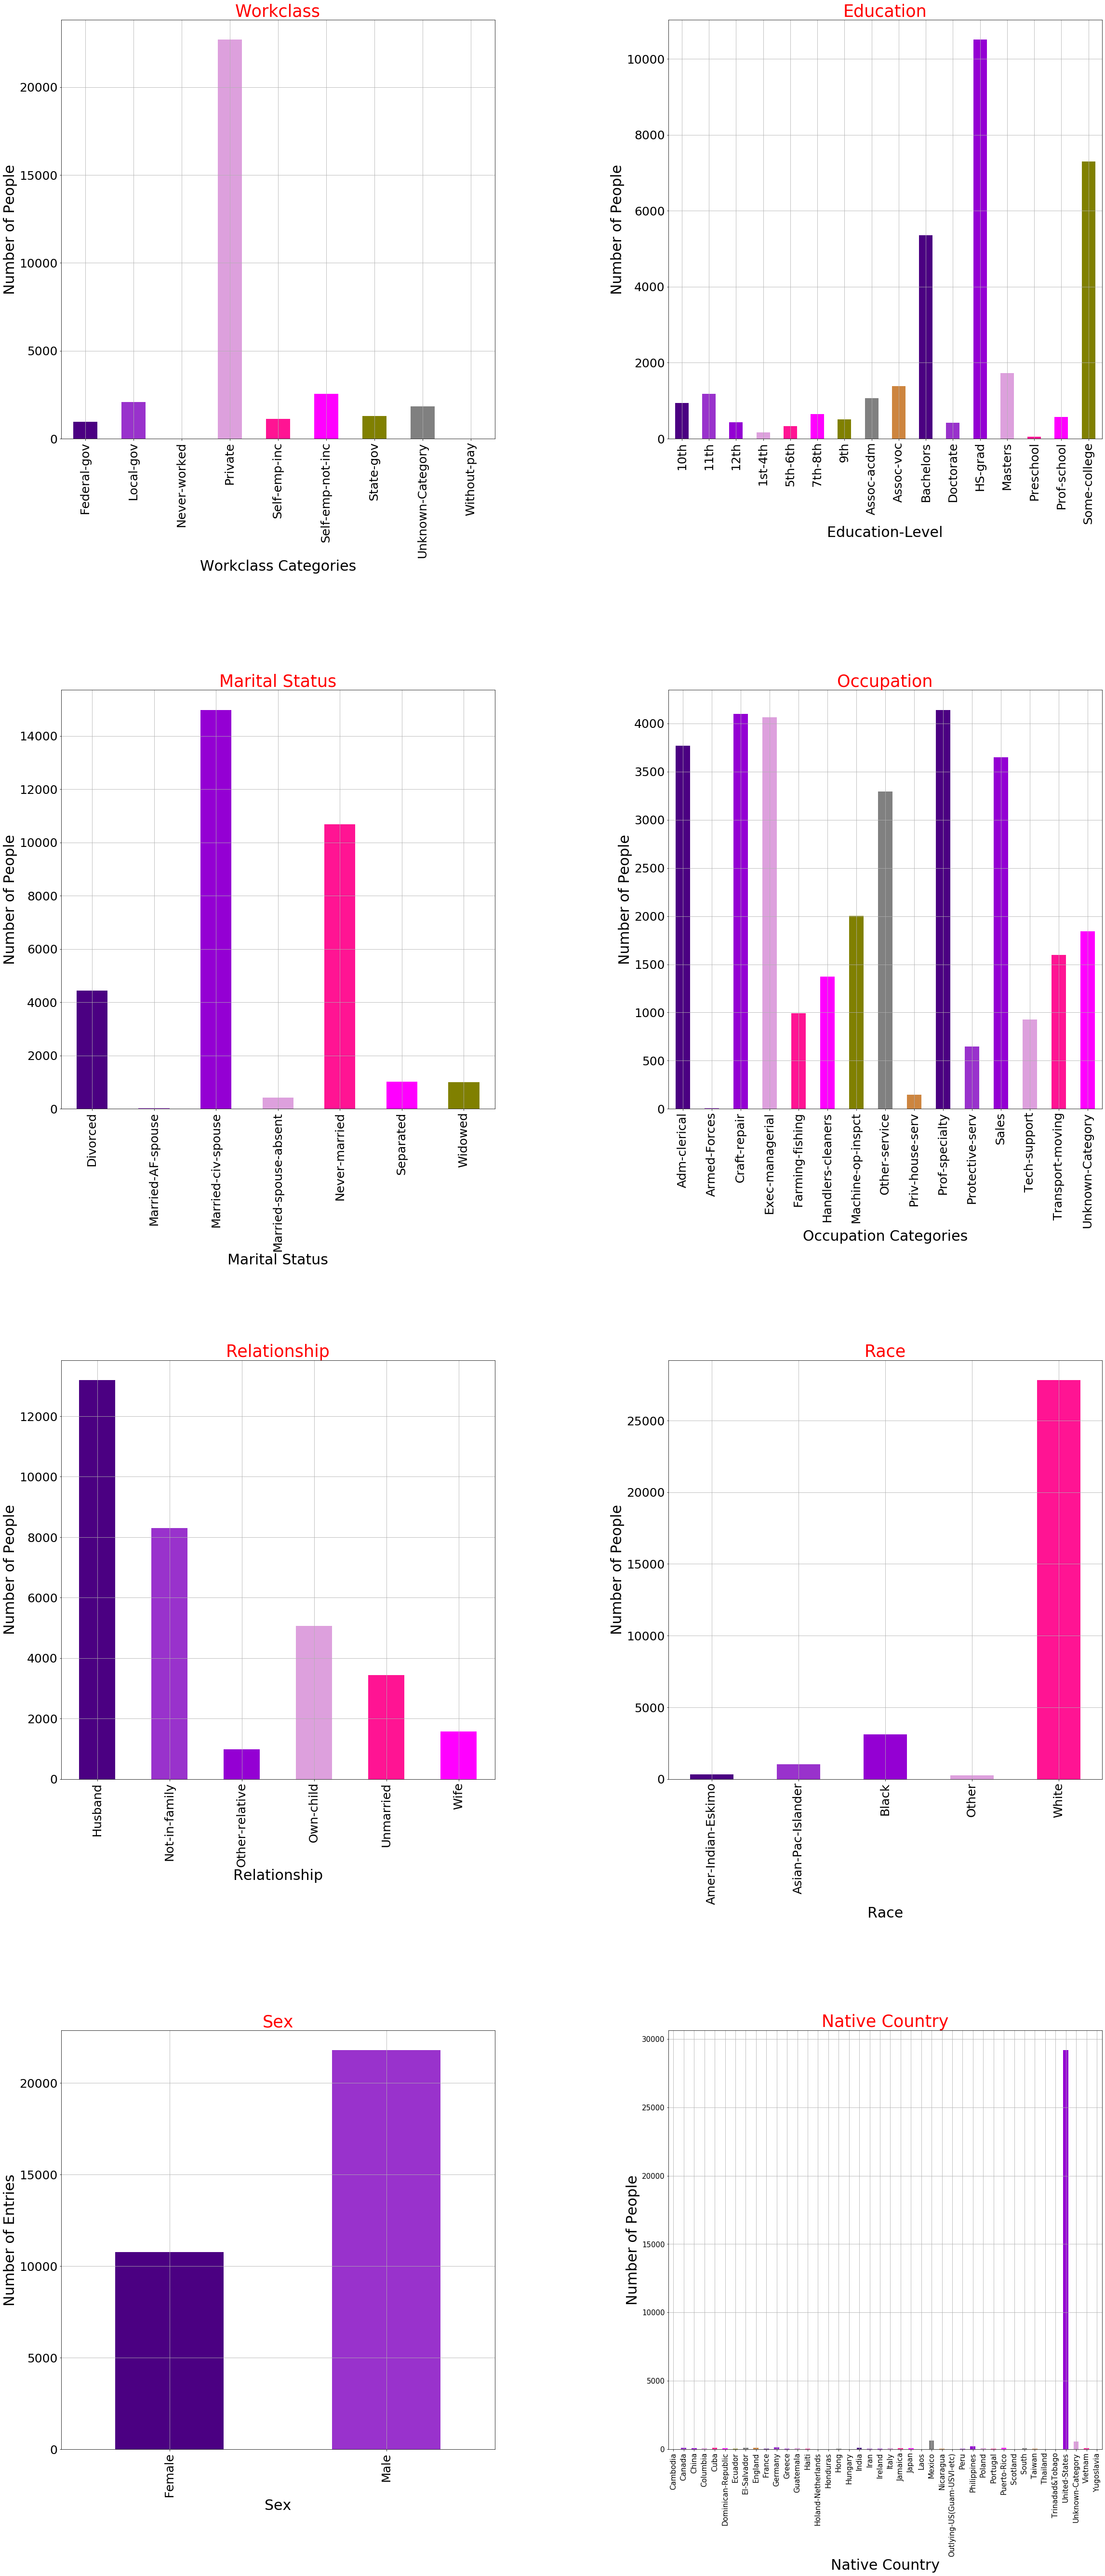

In [9]:
#Exploring trends in Categorical Features:
plt.figure(figsize= (100,100))
plt.subplots_adjust(top=1, bottom=0.30, left=0.10, right=0.40, hspace=0.60, wspace=0.40)

plt.subplot(421)
df.groupby(["workclass"]).size().plot(kind="bar",fontsize=25, color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Workclass Categories',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Workclass',fontsize=35,color='red')
plt.grid(True)

plt.subplot(422)
df.groupby(["education"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Education-Level',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Education',fontsize=35,color='red')
plt.grid(True)

plt.subplot(423)
df.groupby(["marital.status"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Marital Status',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Marital Status',fontsize=35,color='red')
plt.grid(True)

plt.subplot(424)
df.groupby(["occupation"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Occupation Categories',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Occupation',fontsize=35,color='red')
plt.grid(True)

plt.subplot(425)
df.groupby(["relationship"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Relationship',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Relationship',fontsize=35,color='red')
plt.grid(True)

plt.subplot(426)
df.groupby(["race"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Race',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Race',fontsize=35,color='red')
plt.grid(True)

plt.subplot(427)
df.groupby(["sex"]).size().plot(kind="bar",fontsize=25,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Sex',fontsize=30)
plt.ylabel('Number of Entries',fontsize=30)
plt.title('Sex',fontsize=35,color='red')
plt.grid(True)

plt.subplot(428)
df.groupby(["native.country"]).size().plot(kind="bar",fontsize=15,color=['indigo', 'darkorchid', 'darkviolet', 'plum','deeppink', 'magenta', 'olive','grey','peru'])
plt.xlabel('Native Country',fontsize=30)
plt.ylabel('Number of People',fontsize=30)
plt.title('Native Country',fontsize=35,color='red')
plt.grid(True)

plt.show()



The feature Native.country is highly imbalanced since maximum number of entries are United states.

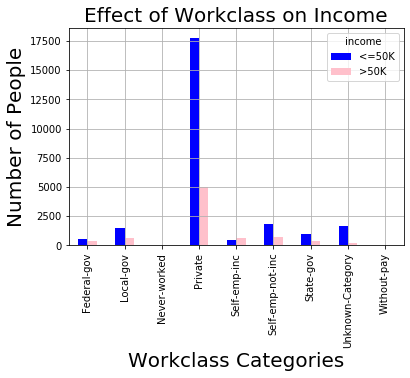

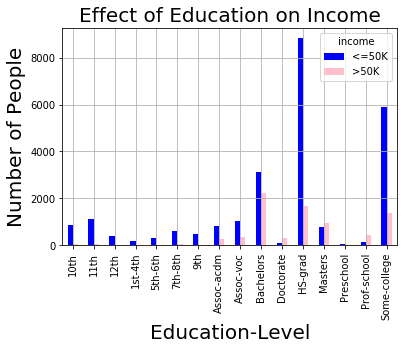

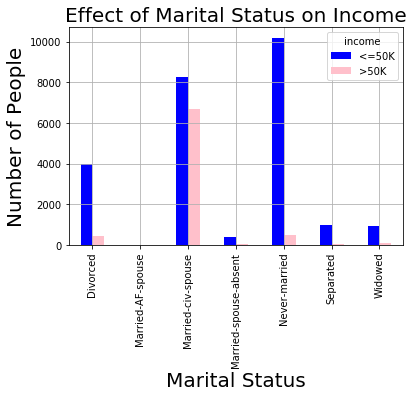

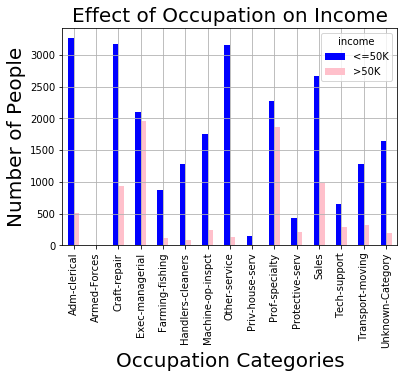

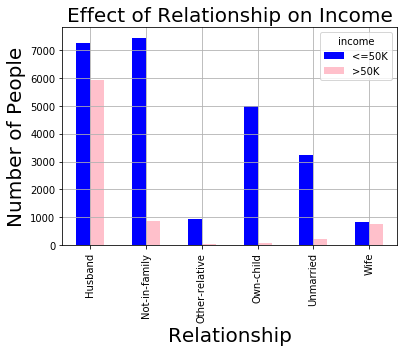

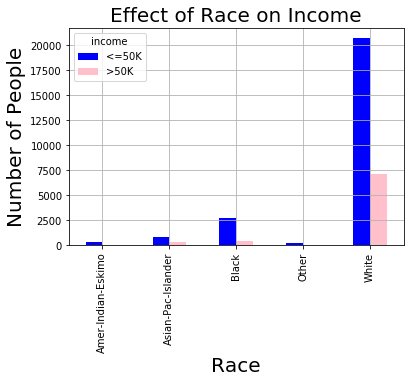

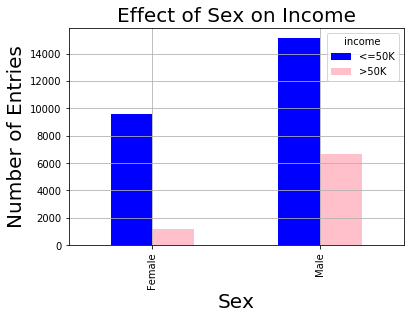

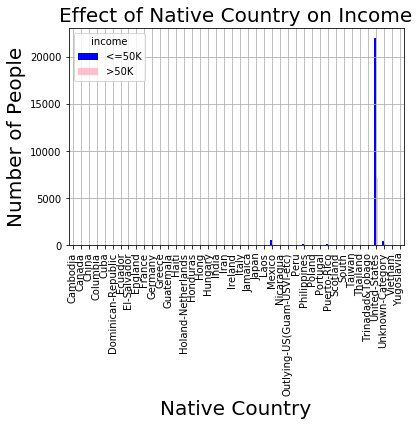

In [10]:
# Effect of Categorical features on target variable-Income

df.groupby(["income","workclass"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Workclass Categories',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Workclass on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","education"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Education-Level',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Education on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","marital.status"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Marital Status',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Marital Status on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","occupation"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Occupation Categories',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Occupation on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","relationship"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Relationship',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Relationship on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","race"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Race',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Race on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","sex"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Sex',fontsize=20)
plt.ylabel('Number of Entries',fontsize=20)
plt.title('Effect of Sex on Income',fontsize=20)
plt.grid(True)

df.groupby(["income","native.country"]).size().unstack("income").plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Native Country',fontsize=20)
plt.ylabel('Number of People',fontsize=20)
plt.title('Effect of Native Country on Income',fontsize=20)
plt.grid(True)






# Target Variable- Income

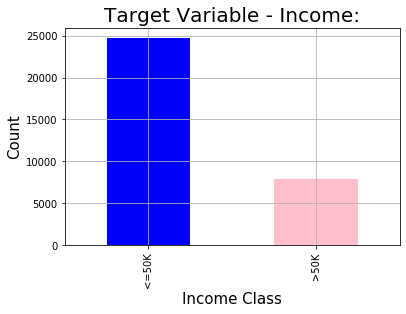

In [11]:
df.groupby(["income"]).size().plot(kind="bar",fontsize=10,color=['blue','pink'])
plt.xlabel('Income Class',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Target Variable - Income:',fontsize=20)
plt.grid(True)

In [12]:
# Total number of records belonging to both income categories

Total_records = len(df)

#Number of records where individual's income is more than $50,000
greater_than_50k = len(df.query('income == ">50K"'))

#Number of records where individual's income is at most $50,000
less_than_equal_50k = len(df.query('income == "<=50K"'))

#Percentage of individuals's income exceeds $50,000
greater_50k_percent = (float(greater_than_50k) / Total_records * 100)

print("Total number of records: {}".format(Total_records))
print("Number of people whose income exceeds $50,000: {}".format(greater_than_50k))
print("Number of people whose income is at most $50,000: {}".format(less_than_equal_50k))
print("Percentage of people whose income exceeds $50,000: {:.4f}%".format(greater_50k_percent))

Total number of records: 32561
Number of people whose income exceeds $50,000: 7841
Number of people whose income is at most $50,000: 24720
Percentage of people whose income exceeds $50,000: 24.0810%


76 % of total people belongs to the category having income less than 50 k

# Analysis of Nominal features 

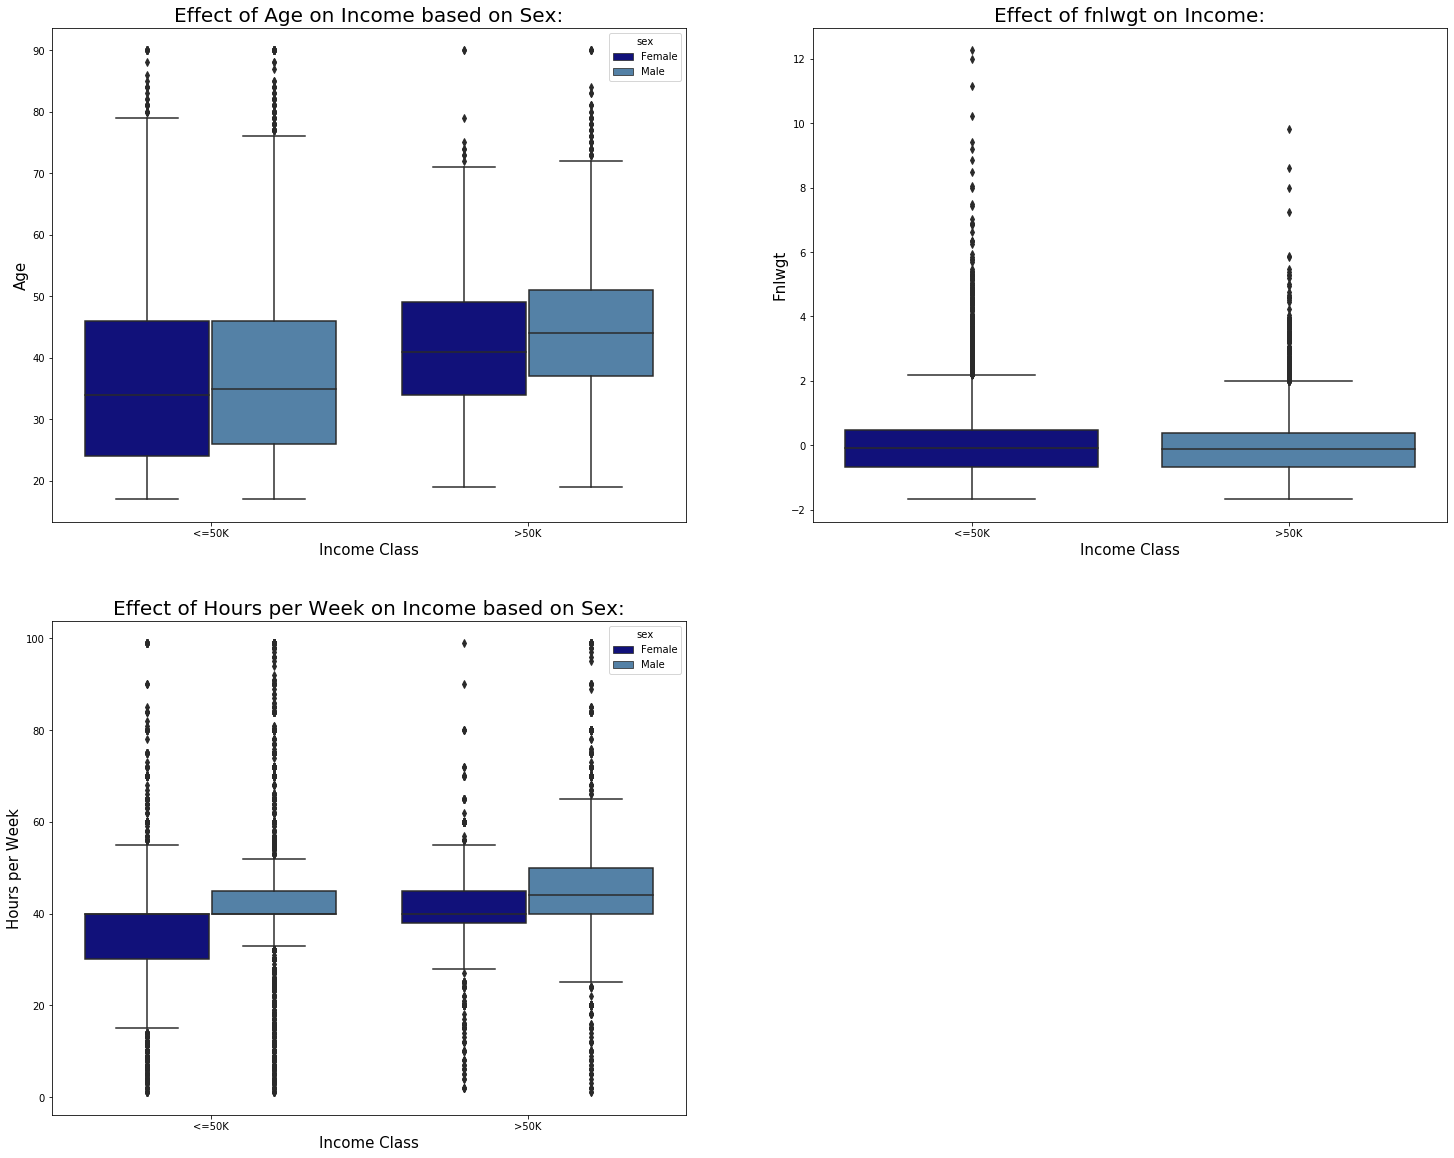

In [13]:
plt.figure(figsize=(25,20))
my_pal = {"Female": "darkblue", "Male":"steelblue"}
my_pal1 = {"<=50K": "darkblue", ">50K":"steelblue"}

plt.subplot(221)
sns.boxplot(x="income", y="age", data=df, hue='sex',palette=my_pal)
plt.xlabel('Income Class',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.title('Effect of Age on Income based on Sex:',fontsize=20)

plt.subplot(222)
fnl = (df["fnlwgt"] - df['fnlwgt'].mean())/df['fnlwgt'].std()
sns.boxplot(x="income", y=fnl, data=df,palette=my_pal1)
plt.xlabel('Income Class',fontsize=15)
plt.ylabel('Fnlwgt',fontsize=15)
plt.title('Effect of fnlwgt on Income:',fontsize=20)

plt.subplot(223)
sns.boxplot(x='income',y ='hours.per.week', hue='sex',data=df,palette=my_pal)
plt.xlabel('Income Class',fontsize=15)
plt.ylabel('Hours per Week',fontsize=15)
plt.title('Effect of Hours per Week on Income based on Sex:',fontsize=20)

plt.show()

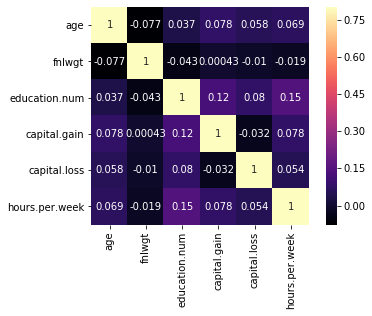

In [14]:
hmap = df.corr()
plt.plot(figsize=(25, 20))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="magma", square=True)

In [15]:
pivot = df.pivot_table(df, index=['income'], aggfunc=np.mean)
pivot

age  capital.gain  capital.loss  education.num        fnlwgt  \
income                                                                       
<=50K   36.783738    148.752468     53.142921       9.595065  190340.86517   
>50K    44.249841   4006.142456    195.001530      11.611657  188005.00000   

        hours.per.week  
income                  
<=50K        38.840210  
>50K         45.473026

# Data Cleaning

In [16]:
# we first start by replacing 'Unknown-Category' values with nan
df = df.replace('Unknown-Category',np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
# now we can proceed with either dropping entire rows with atleast one null value or can replace null with appropriate value
# we can replace null values in workclass by 'Private' since it is most ocurring value i.e. more than 75 % entries are 'Private'
df['workclass'] = df['workclass'].replace(np.nan,'Private')
df['workclass'].isnull().sum()

0

In [18]:
# native.country is another feature with one value repeating in more tham 75 % entries
# So we replace null with 'United-States'
df['native.country'] = df['native.country'].replace(np.nan,'United-States')
df['native.country'].isnull().sum()

0

In [19]:
# occupation column has null values, so we proceed with dropping entire rows having them
df = df[df['occupation'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education.num     30718 non-null int64
marital.status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital.gain      30718 non-null int64
capital.loss      30718 non-null int64
hours.per.week    30718 non-null int64
native.country    30718 non-null object
income            30718 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
# Now we can drop features that are redundant, we proceed with dropping education for being redundant
df = df.drop(['education'], axis = 1)

# Data-Preprocessing 

In [21]:
# replace male with 0 and female with 1
df['sex'] = df['sex'].map({'Male':0,'Female':1})
df['sex'] = df['sex'].infer_objects()
df['sex'].head()

1    1
3    1
4    1
5    1
6    0
Name: sex, dtype: int64

In [22]:
# Replacing feature 'marital.status' with Married and Single.
df["marital.status"] = df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df["marital.status"] = df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')

# replace Single with 0 and Married with 1
df["marital.status"] = df["marital.status"].map({"Single":0,"Married":1})
df["marital.status"] = df["marital.status"].infer_objects()
df["marital.status"].unique()

array([0, 1])

In [23]:
# Replacing feature 'native.country' with United-States and Others. 
df["native.country"] = df["native.country"].replace(['Cambodia' ,'Canada' ,'China' ,'Columbia' ,'Cuba'  ,'Dominican-Republic' , 'Ecuador' , 'El-Salvador' ,'England'  ,'France' , 'Germany'  ,'Greece' ,'Guatemala'  , 'Haiti' , 'Holand-Netherlands' ,'Honduras'  ,'Hong' ,'Hungary' ,'India'   ,'Iran' ,'Ireland' ,'Italy'  ,'Jamaica' ,'Japan' , 'Laos' , 'Mexico'  ,'Nicaragua' ,'Outlying-US(Guam-USVI-etc)','Peru' , 'Philippines' ,'Poland'  ,'Portugal' ,'Puerto-Rico' ,'Scotland' ,'South' , 'Taiwan' ,'Thailand' , 'Trinadad&Tobago' ,'Vietnam' ,'Yugoslavia'], 'Others')

# replace Others with 0 and United-States with 1
df["native.country"] = df["native.country"].map({'United-States':1, 'Others':0})
df['native.country'] = df['native.country'].infer_objects()
df['native.country'].unique()

array([1, 0])

In [24]:
#Mapping the target variable 'income' to values 0 & 1, map income below and 50 k to 0 and above 50 k to 1
df['income'] = df['income'].map({'<=50K':0,'>50K':1})
df['income'] = df['income'].infer_objects()
df['income'].head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64

In [25]:
# Now we perform hot vector encoding for features with nominal values - 'workclass','race','relationship'&'occupation'.
df = pd.get_dummies(df,columns=['workclass','race','relationship','occupation'], prefix=['workclass', 'race_is', 'relation_is', 'occupation_is'], drop_first=True)
df.columns

Index(['age', 'fnlwgt', 'education.num', 'marital.status', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'race_is_Asian-Pac-Islander', 'race_is_Black', 'race_is_Other',
       'race_is_White', 'relation_is_Not-in-family',
       'relation_is_Other-relative', 'relation_is_Own-child',
       'relation_is_Unmarried', 'relation_is_Wife',
       'occupation_is_Armed-Forces', 'occupation_is_Craft-repair',
       'occupation_is_Exec-managerial', 'occupation_is_Farming-fishing',
       'occupation_is_Handlers-cleaners', 'occupation_is_Machine-op-inspct',
       'occupation_is_Other-service', 'occupation_is_Priv-house-serv',
       'occupation_is_Prof-specialty', 'occupation_is_Protective-serv',
       'occupation_is_Sales', 'occupation_is_Tech-support',
       'occupation_is_

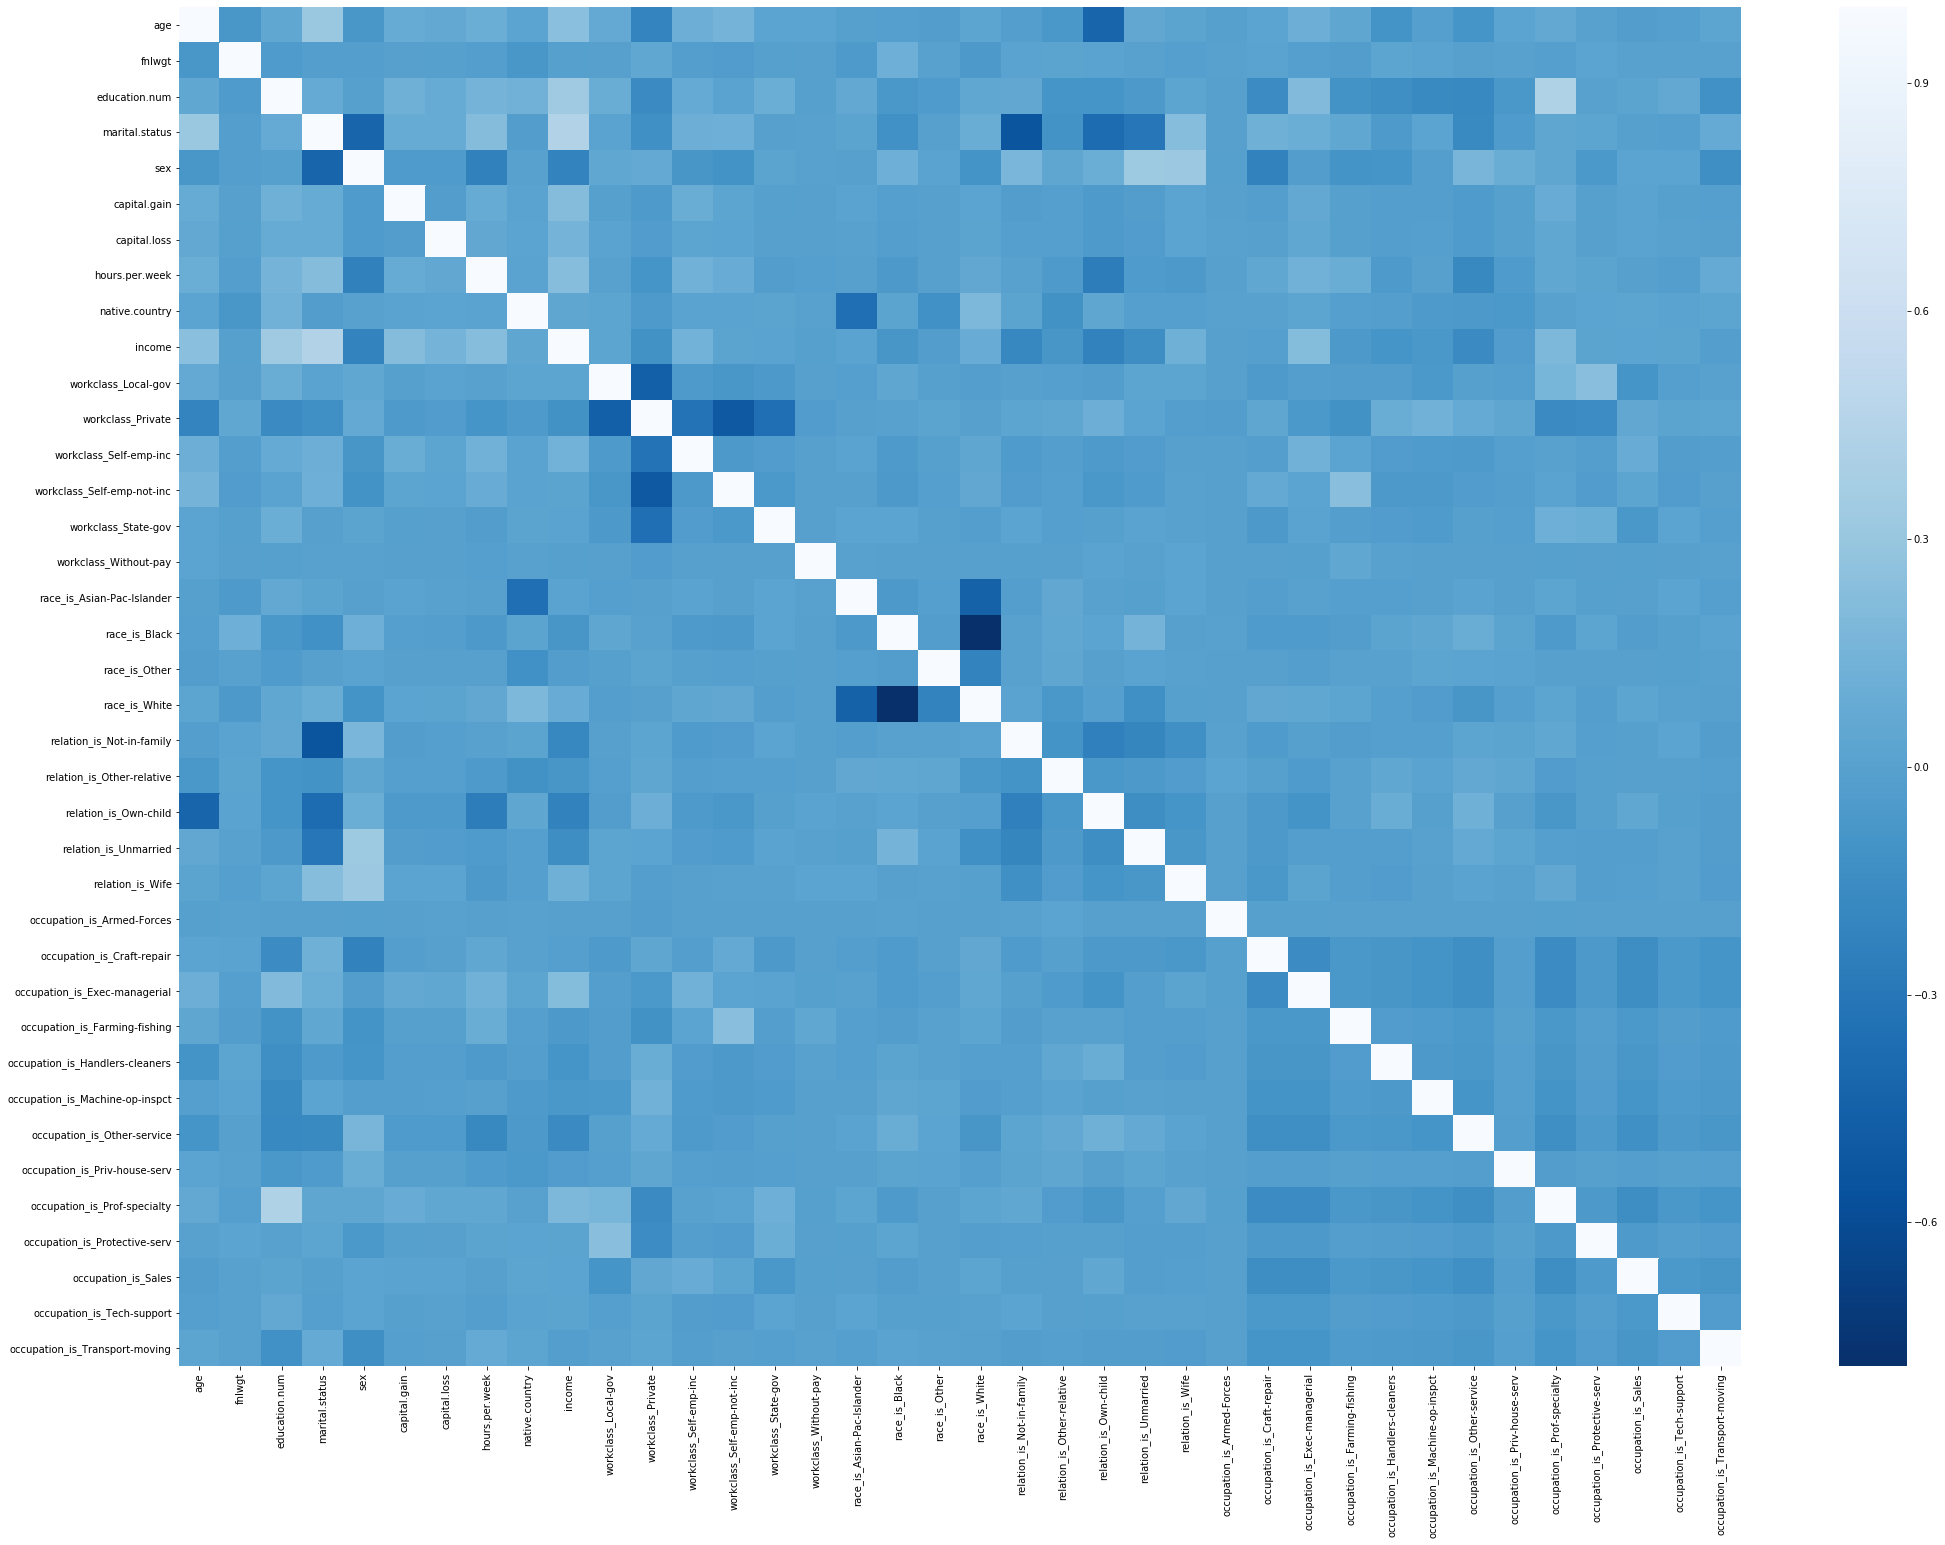

In [26]:
# Plot heat-map for showing correlation
plt.figure(figsize=(35,25))
sns.heatmap(df.corr(),cmap="Blues_r")

In [27]:
# Drop insignificant variable

df = df.drop(columns=['fnlwgt','native.country'], axis=1)
df.columns

Index(['age', 'education.num', 'marital.status', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'income', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'race_is_Asian-Pac-Islander', 'race_is_Black',
       'race_is_Other', 'race_is_White', 'relation_is_Not-in-family',
       'relation_is_Other-relative', 'relation_is_Own-child',
       'relation_is_Unmarried', 'relation_is_Wife',
       'occupation_is_Armed-Forces', 'occupation_is_Craft-repair',
       'occupation_is_Exec-managerial', 'occupation_is_Farming-fishing',
       'occupation_is_Handlers-cleaners', 'occupation_is_Machine-op-inspct',
       'occupation_is_Other-service', 'occupation_is_Priv-house-serv',
       'occupation_is_Prof-specialty', 'occupation_is_Protective-serv',
       'occupation_is_Sales', 'occupation_is_Tech-support',
       'occupation_is_Transport-moving'],
      dtype='ob

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 36 columns):
age                                30718 non-null int64
education.num                      30718 non-null int64
marital.status                     30718 non-null int64
sex                                30718 non-null int64
capital.gain                       30718 non-null int64
capital.loss                       30718 non-null int64
hours.per.week                     30718 non-null int64
income                             30718 non-null int64
workclass_Local-gov                30718 non-null uint8
workclass_Private                  30718 non-null uint8
workclass_Self-emp-inc             30718 non-null uint8
workclass_Self-emp-not-inc         30718 non-null uint8
workclass_State-gov                30718 non-null uint8
workclass_Without-pay              30718 non-null uint8
race_is_Asian-Pac-Islander         30718 non-null uint8
race_is_Black                      30718 non-null u

# Splitting dataset into train and test sets

In [29]:
#Splitting Data into training and testing data:

X1 = df[['age', 'education.num', 'marital.status', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'race_is_Asian-Pac-Islander', 'race_is_Black',
       'race_is_Other', 'race_is_White', 'relation_is_Not-in-family',
       'relation_is_Other-relative', 'relation_is_Own-child',
       'relation_is_Unmarried', 'relation_is_Wife',
       'occupation_is_Armed-Forces', 'occupation_is_Craft-repair',
       'occupation_is_Exec-managerial', 'occupation_is_Farming-fishing',
       'occupation_is_Handlers-cleaners', 'occupation_is_Machine-op-inspct',
       'occupation_is_Other-service', 'occupation_is_Priv-house-serv',
       'occupation_is_Prof-specialty', 'occupation_is_Protective-serv',
       'occupation_is_Sales', 'occupation_is_Tech-support',
       'occupation_is_Transport-moving']]

y1 = df['income']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org1, X_test_org1, y_train1, y_test1 = train_test_split(X1,y1, random_state = 1, test_size=0.25)


scaler1 = MinMaxScaler()
X_train1 = scaler1.fit_transform(X_train_org1)
X_test1 = scaler1.transform(X_test_org1)


# Best Parameters for Models

We will use the best parameters that we established in Project 1, to build our Ensemble Learning Models. Following are the list of best parameters that we established for all the models:

# ENSEMBLE LEARNING MODELS

## 1. Soft Voting Classifier using Logsitic Regression and KNN Classifier

From Project 1 we have:
1. n=8 as the best parameter using grid search for KNN Classifier.
2. 'C': 1.0, 'max_iter': 1000, 'penalty': 'l1' as the best parameters using grid search for Logistic Regression.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(C= 1.0, max_iter= 1000, penalty= 'l1')
log_clf.fit(X_train1, y_train1)
knn_clf = KNeighborsClassifier(8)
knn_clf.fit(X_train1, y_train1)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf),], voting='soft')
voting_clf.fit(X_train1, y_train1)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_train1, y_train1)
    y_pred1 = clf.predict(X_test1)
    print('Train Score: ', clf.score(X_train1, y_train1))
    print('Test Score: ', clf.score(X_test1, y_test1))
    print(clf.__class__.__name__, accuracy_score(y_test1, y_pred1))
    print("\n Confusion Matrix: \n")
    print(confusion_matrix(y_test1.values, y_pred1))
    print("\n Classification Report: \n")
    print(classification_report(y_test1.values, y_pred1))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Score:  0.84816390311659
Test Score:  0.8479166666666667
LogisticRegression 0.8479166666666667

 Confusion Matrix: 

[[5323  429]
 [ 739 1189]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.73      0.62      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680

Train Score:  0.8591023526347773
Test Score:  0.8315104166666667
KNeighborsClassifier 0.8315104166666667

 Confusion Matrix: 

[[5348  404]
 [ 890 1038]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5752
           1       0.72      0.54      0.62      1928

    accuracy                           0.83      7680
   macro avg       0.79      0.73      0.75      7680
weighted avg       0.82      0.83      0.82

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Score:  0.8643979512110426
Test Score:  0.8470052083333334
VotingClassifier 0.8470052083333334

 Confusion Matrix: 

[[5300  452]
 [ 723 1205]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5752
           1       0.73      0.62      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.80      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



## 2. Hard Votting Classifier using Logsitic Regression and KNN Classifier

From Project 1 we have:
1. n=8 as the best parameter using grid search for KNN Classifier.
2. 'C': 1.0, 'max_iter': 1000, 'penalty': 'l1' as the best parameters using grid search for Logistic Regression.

In [31]:
log_clf = LogisticRegression(C= 1.0, max_iter= 1000, penalty= 'l1')
log_clf.fit(X_train1, y_train1)
knn_clf = KNeighborsClassifier(8)
knn_clf.fit(X_train1, y_train1)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train1, y_train1)

for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_train1, y_train1)
    y_pred2 = clf.predict(X_test1)
    print(clf.__class__.__name__, accuracy_score(y_test1, y_pred2))
    print('Train Score: ', clf.score(X_train1, y_train1))
    print('Test Score: ', clf.score(X_test1, y_test1))
    print("\n Confusion Matrix: \n")
    print(confusion_matrix(y_test1.values, y_pred2))
    print("\n Classification Report: \n")
    print(classification_report(y_test1.values, y_pred2))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.8479166666666667
Train Score:  0.8481204965708828
Test Score:  0.8479166666666667

 Confusion Matrix: 

[[5323  429]
 [ 739 1189]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.73      0.62      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680

KNeighborsClassifier 0.8315104166666667
Train Score:  0.8591023526347773
Test Score:  0.8315104166666667

 Confusion Matrix: 

[[5348  404]
 [ 890 1038]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5752
           1       0.72      0.54      0.62      1928

    accuracy                           0.83      7680
   macro avg       0.79      0.73      0.75      7680
weighted avg       0.82      0.83      0.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier 0.8330729166666667
Train Score:  0.8469051132910843
Test Score:  0.8330729166666667

 Confusion Matrix: 

[[5499  253]
 [1029  899]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5752
           1       0.78      0.47      0.58      1928

    accuracy                           0.83      7680
   macro avg       0.81      0.71      0.74      7680
weighted avg       0.83      0.83      0.82      7680



## 3. Bagging with SVC w/ Linear kernel

From Project 1 we have: (C=10, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False) as the best parameters using grid search for SVC with Linear kernel.

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

svm_clf = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear', max_iter= -1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
bag_clf = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train1, y_train1)
y_pred3= bag_clf.predict(X_test1)
print('Train score:',bag_clf.score(X_train1, y_train1))
print('Test score:',bag_clf.score(X_test1, y_test1))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, y_pred3))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, y_pred3))

Train score: 0.8328413924819863
Test score: 0.8328125

 Confusion Matrix: 

[[5321  431]
 [ 853 1075]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      5752
           1       0.71      0.56      0.63      1928

    accuracy                           0.83      7680
   macro avg       0.79      0.74      0.76      7680
weighted avg       0.82      0.83      0.83      7680



##  4. Bagging With Decision Tree

From Project 1 we have: {'criterion': 'gini', 'max_depth': 17, 'max_features': 16, 'min_samples_split': 230} as the best parameter using grid search for Decision Tree Classifier.

In [33]:
from sklearn.model_selection import  GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# create the classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=17, max_features= 16, min_samples_split= 230)
bc = BaggingClassifier(base_estimator=dt, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score=True) 

bc.fit(X_train1, y_train1)
y_pred1 = bc.predict(X_test1)
print(accuracy_score(y_test1, y_pred1))
print('Train score: {:.4f}'.format(bc.score(X_train1, y_train1)))
print('Test score: {:.4f}'.format(bc.score(X_test1, y_test1)))

print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, y_pred1))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, y_pred1))

0.7489583333333333
Train score: 0.7516
Test score: 0.7490

 Confusion Matrix: 

[[5752    0]
 [1928    0]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      5752
           1       0.00      0.00      0.00      1928

    accuracy                           0.75      7680
   macro avg       0.37      0.50      0.43      7680
weighted avg       0.56      0.75      0.64      7680



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 5. Pasting with SVC w/ Linear kernel

From Project 1 we have: (C=10, gamma=0.1, kernel='linear', random_state=0) as the best parameters using grid search for SVC with Linear kernel.

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC


svm_clf = SVC(C=10, gamma=0.1, kernel='linear', random_state=0)
bag_clf = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train1, y_train1)
y_pred4= bag_clf.predict(X_test1)
print('Train score:{:.4f}'.format(bag_clf.score(X_train1, y_train1)))
print('Test score:{:.4f}'.format(bag_clf.score(X_test1, y_test1)))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, y_pred4))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, y_pred4))

Train score:0.8333
Test score:0.8324

 Confusion Matrix: 

[[5320  432]
 [ 855 1073]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5752
           1       0.71      0.56      0.63      1928

    accuracy                           0.83      7680
   macro avg       0.79      0.74      0.76      7680
weighted avg       0.82      0.83      0.83      7680



## 6. Pasting with Decision Tree Classifier

From Project 1 we have: {'criterion': 'gini', 'max_depth': 17, 'max_features': 16, 'min_samples_split': 230} as the best parameter using grid search for Decision Tree Classifier.

In [35]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import BaggingClassifier

# create the classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=17, max_features= 16, min_samples_split= 230)
bc = BaggingClassifier(base_estimator=dt, n_estimators=500, max_samples=100, bootstrap=False, random_state=0) 

bc.fit(X_train1, y_train1)
y_pred5 = bc.predict(X_test1)
print(accuracy_score(y_test1, y_pred5))
print('Train score: {:.4f}'.format(bc.score(X_train1, y_train1)))
print('Test score: {:.4f}'.format(bc.score(X_test1, y_test1)))

print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, y_pred5))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, y_pred5))

0.7489583333333333
Train score: 0.7516
Test score: 0.7490

 Confusion Matrix: 

[[5752    0]
 [1928    0]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      5752
           1       0.00      0.00      0.00      1928

    accuracy                           0.75      7680
   macro avg       0.37      0.50      0.43      7680
weighted avg       0.56      0.75      0.64      7680



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 7. ADA Boosting with Decision Tree Classfier

From Project 1 we have: {'criterion': 'gini', 'max_depth': 17, 'max_features': 16, 'min_samples_split': 230} as the best parameter using grid search for Decision Tree Classifier.

In [36]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', max_depth=17, max_features= 16, min_samples_split= 230), n_estimators=400, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train1, y_train1)
y_pred6= ada_clf.predict(X_test1)
print('Train score:',(ada_clf.score(X_train1, y_train1)))
print('Test score:',(ada_clf.score(X_test1, y_test1)))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, y_pred6))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, y_pred6))

Train score: 0.975648927858321
Test score: 0.834765625

 Confusion Matrix: 

[[5170  582]
 [ 687 1241]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5752
           1       0.68      0.64      0.66      1928

    accuracy                           0.83      7680
   macro avg       0.78      0.77      0.78      7680
weighted avg       0.83      0.83      0.83      7680



## 8. ADA Boosting with Logistic Regression

From Project 1 we have: {'C': 1.0, 'max_iter': 1000, 'penalty': 'l1'} as the best parameters using grid search for Logistic Regression.

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

ada_clf1 = AdaBoostClassifier(LogisticRegression(C= 1.0, max_iter= 1000, penalty= 'l1'), n_estimators=300, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf1.fit(X_train1, y_train1)
y_pred7= ada_clf1.predict(X_test1)
print('Train score:',(ada_clf1.score(X_train1, y_train1)))
print('Test score:',(ada_clf1.score(X_test1, y_test1)))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, y_pred7))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, y_pred7))

Train score: 0.751627745464016
Test score: 0.7489583333333333

 Confusion Matrix: 

[[5752    0]
 [1928    0]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      5752
           1       0.00      0.00      0.00      1928

    accuracy                           0.75      7680
   macro avg       0.37      0.50      0.43      7680
weighted avg       0.56      0.75      0.64      7680



## 9. Gradient Boosting

In [38]:
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
params = {'learning_rate': [0.01, 0.1, 1, 10], 'max_depth':range(1,20,2), 'n_estimators': range(100,500,100)}
gbrt = GradientBoostingClassifier(random_state=0)
bc_grid1 = GridSearchCV(estimator=gbrt, param_grid=params , cv=5)
bc_grid1.fit(X_train1[:500], y_train1[:500])

print("Accuracy on training set: {:.4f}".format(bc_grid1.score(X_train1[:500], y_train1[:500])))
print("Accuracy on test set: {:.4f}".format(bc_grid1.score(X_test1[:500], y_test1[:500])))
print(bc_grid1.best_params_)

Accuracy on training set: 0.8600
Accuracy on test set: 0.8460
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}


In [39]:
gbrt1 = GradientBoostingClassifier(random_state=0,learning_rate=0.1, max_depth=1, n_estimators=100)
gbrt1.fit(X_train1, y_train1)
y_pred8= gbrt1.predict(X_test1)
print("Accuracy on training set: {:.4f}".format(gbrt1.score(X_train1, y_train1)))
print("Accuracy on test set: {:.4f}".format(gbrt1.score(X_test1, y_test1)))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, y_pred8))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, y_pred8))

Accuracy on training set: 0.8479
Accuracy on test set: 0.8482

 Confusion Matrix: 

[[5488  264]
 [ 902 1026]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      5752
           1       0.80      0.53      0.64      1928

    accuracy                           0.85      7680
   macro avg       0.83      0.74      0.77      7680
weighted avg       0.84      0.85      0.84      7680



<IPython.core.display.Javascript object>


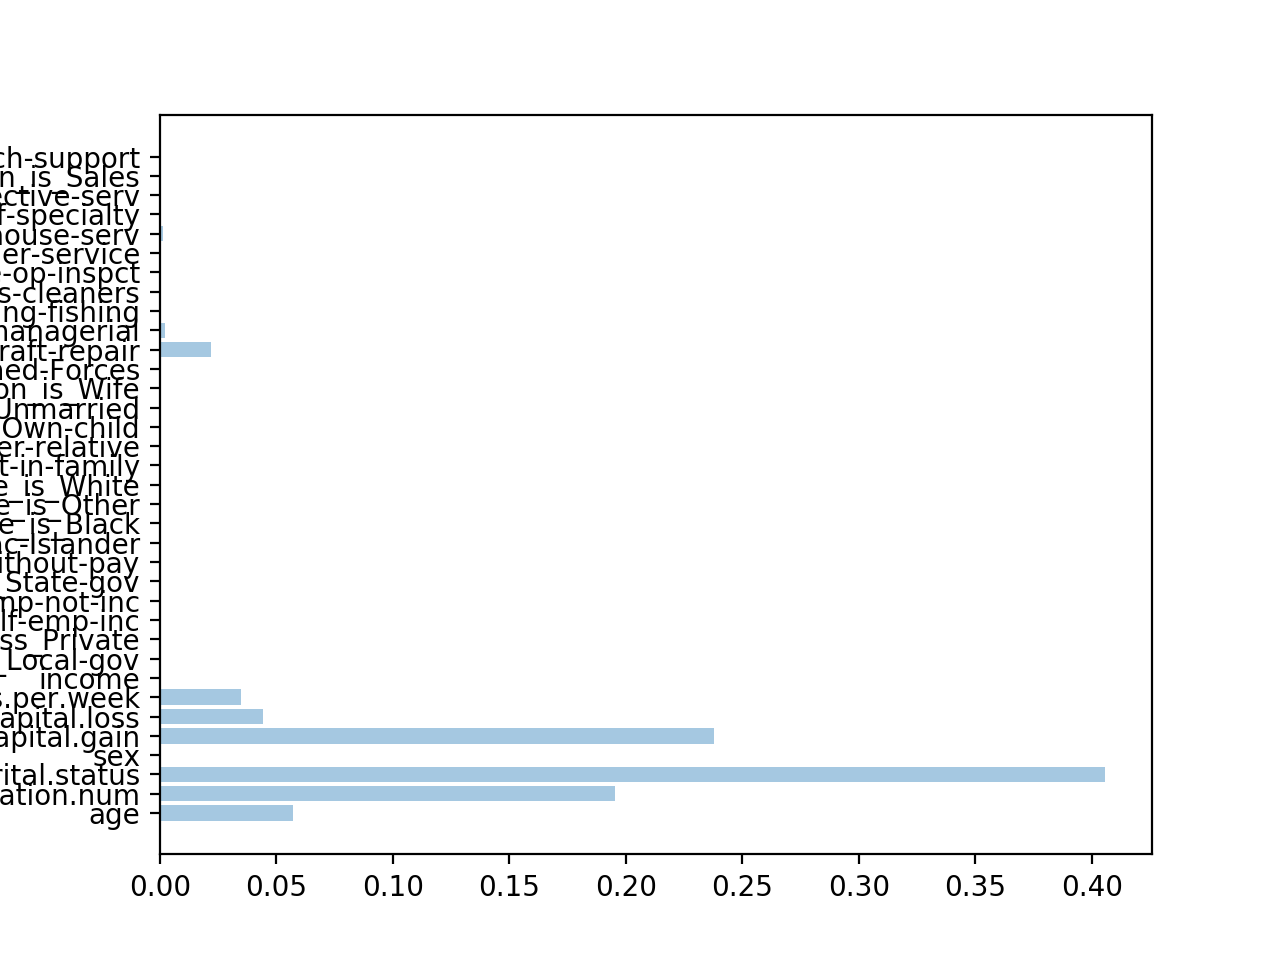

([<matplotlib.axis.YTick at 0x1a1c5861d0>,
 <a list of 35 Text yticklabel objects>)

In [41]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.1, max_depth=1, n_estimators=100)
gbrt.fit(X_train1, y_train1)

%matplotlib notebook

y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = df.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

# CLASSIFICATION WITH PCA

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train2 = sc.fit_transform(X_train1)  
X_test2 = sc.transform(X_test1)

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  
X_train_pca= pca.fit_transform(X_train2)  
X_test_pca = pca.transform(X_test2)

## A. KNN Classifier with PCA

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

train_score_array1 = []
test_score_array1 = []

#create new a knn model
knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 10)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv = 3)

#fit model to data
knn_gscv.fit(X_train2, y_train1)
ypred1 = knn_gscv.predict(X_test2)

#check the best parameters
print(knn_gscv.best_params_)
print("Best Score :", knn_gscv.best_score_)

{'n_neighbors': 9}
Best Score : 0.8318430419307231


In [45]:
#Run model with best parameters
knn1 = KNeighborsClassifier(9)
knn1.fit(X_train1, y_train1)
train_score_array1.append(knn1.score(X_train2, y_train1))
test_score_array1.append(knn1.score(X_test2, y_test1))
ypred1 = knn1.predict(X_test2)

#Show performance metrics
from sklearn import metrics
print("Train Score:",knn1.score(X_train2, y_train1))
print("Test Score:",knn1.score(X_test2,y_test1))
print("\nReport:", metrics.classification_report(y_test1, ypred1))

#Confusion Matrix
pd.crosstab(y_test1, ypred1, rownames=['True'], colnames=['Predicted'], margins=True)

Train Score: 0.8348815001302197
Test Score: 0.8248697916666666

Report:               precision    recall  f1-score   support

           0       0.84      0.95      0.89      5752
           1       0.75      0.45      0.56      1928

    accuracy                           0.82      7680
   macro avg       0.79      0.70      0.73      7680
weighted avg       0.82      0.82      0.81      7680



Predicted     0     1   All
True                       
0          5463   289  5752
1          1056   872  1928
All        6519  1161  7680

In [46]:
#KNN with cross-validation
from sklearn.model_selection import cross_val_score

#train model with cv of 5 
cv_train_scores = cross_val_score(knn1, X_train2, y_train1)
cv_test_scores = cross_val_score(knn1, X_test2, y_test1)

#print each cv score (accuracy) and average them
print('Train scores', cv_train_scores)
print('Test scores', cv_test_scores)
print("Train cv_scores mean:{:.4f}".format(np.mean(cv_train_scores)))
print("Test cv_scores mean:{:.4f}".format(np.mean(cv_test_scores)))

Train scores [0.82877604 0.83826019 0.82849329]
Test scores [0.81257321 0.82617188 0.81438062]
Train cv_scores mean:0.8318
Test cv_scores mean:0.8177


## B. Logistic Regression with PCA

In [47]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train2, y_train1)
    log_l2.fit(X_train2, y_train1)
    train_score_l1.append(log_l1.score(X_train2, y_train1))
    train_score_l2.append(log_l2.score(X_train2, y_train1))
    test_score_l1.append(log_l1.score(X_test2, y_test1))
    test_score_l2.append(log_l2.score(X_test2, y_test1))
    

yPred2=log_l1.predict(X_test2)
ypred3=log_l2.predict(X_test2)
print("Test Score for L1:",log_l1.score(X_test2, y_test1))
print("Test Score for L2:",log_l2.score(X_test2, y_test1))

Test Score for L1: 0.8477864583333333
Test Score for L2: 0.8477864583333333


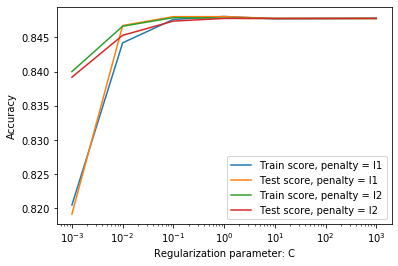

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [49]:
#Using Grid search to get best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "max_iter":[1000]}# l1-lasso l2-ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train2,y_train1)

print("tuned hpyerparameters :(best parameters)",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters) {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1'}
accuracy : 0.8469051132910843


In [50]:
#Run model with best parameters
logreg2=LogisticRegression(C=0.1,penalty="l1", max_iter= 1000)
logreg2.fit(X_train2,y_train1)
ypred2 = logreg2.predict(X_test2)
print("Train score",logreg2.score(X_train2,y_train1))

print("Test score",logreg2.score(X_test2,y_test1))

print("\nReport:", metrics.classification_report(y_test1, ypred2))

Train score 0.8476430245681049
Test score 0.848046875

Report:               precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.73      0.62      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



Optimal number of features: 34
Selected features: ['age', 'education.num', 'marital.status', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'race_is_Asian-Pac-Islander', 'race_is_Black', 'race_is_White', 'relation_is_Not-in-family', 'relation_is_Other-relative', 'relation_is_Own-child', 'relation_is_Unmarried', 'relation_is_Wife', 'occupation_is_Armed-Forces', 'occupation_is_Craft-repair', 'occupation_is_Exec-managerial', 'occupation_is_Farming-fishing', 'occupation_is_Handlers-cleaners', 'occupation_is_Machine-op-inspct', 'occupation_is_Other-service', 'occupation_is_Priv-house-serv', 'occupation_is_Prof-specialty', 'occupation_is_Protective-serv', 'occupation_is_Sales', 'occupation_is_Tech-support', 'occupation_is_Transport-moving']


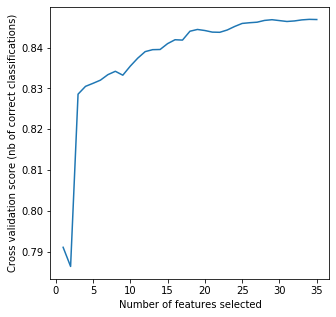

In [51]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train2, y_train1)
ypred2 = rfecv.predict(X_test2)
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X_train_org1.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [52]:
#Show performance metrics using CV
print("Train score for rfecv",rfecv.score(X_train2,y_train1))
print("Test score for rfecv",rfecv.score(X_test2,y_test1))
print("\nReport:", metrics.classification_report(y_test1, ypred2))

Train score for rfecv 0.8478600572966404
Test score for rfecv 0.8477864583333333

Report:               precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.73      0.62      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



## C. Decision Trees with PCA

In [53]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train2, y_train1)
ypred3 = dtree.predict(X_test2)

print("Accuracy on training set: {:.4f}".format(dtree.score(X_train2, y_train1)))
print("Accuracy on test set: {:.4f}".format(dtree.score(X_test2, y_test1)))
print("\nReport:", metrics.classification_report(y_test1, ypred3))

Accuracy on training set: 0.8388
Accuracy on test set: 0.8393

Report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90      5752
           1       0.76      0.53      0.62      1928

    accuracy                           0.84      7680
   macro avg       0.81      0.73      0.76      7680
weighted avg       0.83      0.84      0.83      7680



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

sample_split_range = list(range(1, 10))
parameter_grid = {"criterion":['gini','entropy'],
                  'max_depth': range(1,20,2),
                  'max_features': range(1,17),
                  'min_samples_split':range(10,500,20)}

grid_search = GridSearchCV(decision_tree_classifier, param_grid = parameter_grid,cv = 5)
grid_search.fit(X_train2[:500],y_train1[:500])

print("Best Score:",format(grid_search.best_score_))
print("Best params:",format(grid_search.best_params_))

Best Score: 0.838
Best params: {'criterion': 'entropy', 'max_depth': 17, 'max_features': 14, 'min_samples_split': 90}


In [55]:
#Run model with best parameters
d_tree1 = DecisionTreeClassifier(criterion='gini',max_depth = 11, max_features = 15, min_samples_split = 90)
d_tree1.fit(X_train2,y_train1)
ypred3=d_tree1.predict(X_test2)
print("Test score",d_tree1.score(X_test2,y_test1))
print("\nReport:", metrics.classification_report(y_test1, ypred3))

Test score 0.8565104166666667

Report:               precision    recall  f1-score   support

           0       0.87      0.95      0.91      5752
           1       0.79      0.58      0.67      1928

    accuracy                           0.86      7680
   macro avg       0.83      0.77      0.79      7680
weighted avg       0.85      0.86      0.85      7680



In [56]:
#Cross validation on Decision Tree using k-fold cross validation
from sklearn.model_selection import cross_val_score

#train model with cv of 3
dtreecv= DecisionTreeClassifier(criterion='gini',max_depth = 11, max_features = 15, min_samples_split = 90)

dtree_cv_train_scores = cross_val_score(dtreecv, X_train2, y_train1, cv= 5)
dtree_cv_test_scores = cross_val_score(dtreecv, X_test2, y_test1, cv= 5)

#print each cv score (accuracy) and average them
print('Train CV scores', dtree_cv_train_scores)
print("Average Cross Validation Train Score:{:.4f}".format(np.mean(dtree_cv_train_scores)))

print('Test CV scores', dtree_cv_test_scores)
print("Average Cross Validation Test Score:{:.4f}".format(np.mean(dtree_cv_test_scores)))

Train CV scores [0.84530267 0.85503472 0.85413501 0.84436727 0.84284784]
Average Cross Validation Train Score:0.8483
Test CV scores [0.85230969 0.84645413 0.84635417 0.85407166 0.83973941]
Average Cross Validation Test Score:0.8478


## D. Linear SVC

In [57]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = svm.LinearSVC(C=2.0, random_state=0)
clf.fit(X_train2,y_train1)
print('Train accuracy = {:.4f}'.format(clf.score(X_train2, y_train1)))
print('Test accuracy = {:.4f}'.format(clf.score(X_test2, y_test1)))
predictions = clf.predict(X_test2)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, predictions))

accuracy_train = np.round(clf.score(X_train2, y_train1) * 100, 2)
accuracy_test = np.round(clf.score(X_test2, y_test1) * 100, 2)

Train accuracy = 0.8472
Test accuracy = 0.8484

 Confusion Matrix: 

[[5331  421]
 [ 743 1185]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.74      0.61      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



In [58]:
#Use Grid Search to find best parameters
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
  
param_grid_linear= {'C': [0.1, 1 ,10, 100, 1000]}   
grid_linear = GridSearchCV(svm.LinearSVC(), param_grid_linear, refit = True, cv=3,n_jobs=-1) 
  
# fitting the model for grid search 
grid_linear.fit(X_train1, y_train1)
SVC_GS_train= grid_linear.score(X_train1, y_train1)
print('Train score of Linear SVC Grid Search:',SVC_GS_train)
grid_predictions_linearsvc = grid_linear.predict(X_test1) 
SVC_GS_test= accuracy_score(grid_predictions_linearsvc, y_test1)
print('Test score of Linear SVC Grid Search:',SVC_GS_test)

# print best parameter after tuning 
print(grid_linear.best_params_) 

Train score of Linear SVC Grid Search: 0.8473825852938623
Test score of Linear SVC Grid Search: 0.8485677083333333
{'C': 10}


In [59]:
#Run model with best parameters
clf = svm.LinearSVC(C=10, random_state=0)
clf.fit(X_train2,y_train1)
predictions = clf.predict(X_test2)
print('Train accuracy = {:.4f}'.format(clf.score(X_train2, y_train1)))
print('Test accuracy = {:.4f}'.format(clf.score(X_test2, y_test1)))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, predictions))

Train accuracy = 0.8431
Test accuracy = 0.8462

 Confusion Matrix: 

[[5278  474]
 [ 707 1221]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5752
           1       0.72      0.63      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.80      0.78      0.79      7680
weighted avg       0.84      0.85      0.84      7680



In [60]:
#Cross Validation
from sklearn.model_selection import cross_val_score

cv_scores_svc_train = cross_val_score(clf, X_train2, y_train1)
cv_scores_svc_test = cross_val_score(clf, X_test2, y_test1)

#Show performance metrics
print('Train CV scores', cv_scores_svc_train)
print("Traincv_scores mean:{:.4f}".format(np.mean(cv_scores_svc_train)))
print(cv_scores_svc_test)
print("Test cv_scores mean:{:.4f}".format(np.mean(cv_scores_svc_test)))

Train CV scores [0.83802083 0.84385988 0.82966532]
Traincv_scores mean:0.8372
[0.83678251 0.846875   0.84251661]
Test cv_scores mean:0.8421


## E. SVM using RBF Kernel with PCA

In [61]:
clf1 = svm.SVC(kernel="rbf", random_state= 0)
clf1.fit(X_train2, y_train1)
print('Train accuracy = {:.4f}'.format(clf1.score(X_train2, y_train1)))
print('Test accuracy = {:.4f}'.format(clf1.score(X_test2, y_test1)))
predictions = clf.predict(X_test2)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, predictions))

Train accuracy = 0.8570
Test accuracy = 0.8467

 Confusion Matrix: 

[[5278  474]
 [ 707 1221]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5752
           1       0.72      0.63      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.80      0.78      0.79      7680
weighted avg       0.84      0.85      0.84      7680



In [62]:
#Using GridSearch to get the best parameters
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [1 ,10],  
              'gamma': [0.1,1] 
              }  
  
grid = GridSearchCV(SVC(kernel='linear'), param_grid, refit = True, cv=3,n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(X_train2, y_train1)
grid_lin_train = grid.score(X_train2, y_train1)
print('Train score of SVM with Linear Kernel:',grid_lin_train)

# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test2) 
grid_lin_test = accuracy_score(grid_predictions,y_test1)
print('Test score of SVM with Linear Kernel:',grid_lin_test)
print(classification_report(y_test1,grid_predictions))

Train score of SVM with Linear Kernel: 0.8475996180223978
{'C': 1, 'gamma': 0.1}
Test score of SVM with Linear Kernel: 0.848046875
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.73      0.62      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



In [63]:
#Run model using best parameters
clf1 = svm.SVC(kernel="rbf", C=1, gamma=0.1, random_state= 0)
clf1.fit(X_train2, y_train1)
print('Train accuracy = {:.4f}'.format(clf1.score(X_train2, y_train1)))
print('Test accuracy = {:.4f}'.format(clf1.score(X_test2, y_test1)))
predictions = clf.predict(X_test2)

Train accuracy = 0.8654
Test accuracy = 0.8405


In [64]:
#Cross Validation on RBF
from sklearn.model_selection import cross_val_score
cv_scores_train_rbf = cross_val_score(clf1, X_train2, y_train1, cv=3)
cv_scores_test_rbf = cross_val_score(clf1, X_test2, y_test1, cv=3)
#print each cv score (accuracy) and average them
print('Train CV scores', cv_scores_train_rbf)
print("Train cv_scores mean:{:.4f}".format(np.mean(cv_scores_train_rbf)))
print('Test CV scores', cv_scores_test_rbf)
print("Test cv_scores mean:{:.4f}".format(np.mean(cv_scores_test_rbf)))

Train CV scores [0.84049479 0.84750619 0.83539523]
Train cv_scores mean:0.8411
Test CV scores [0.81960172 0.82148438 0.82571317]
Test cv_scores mean:0.8223


## F. SVM using Linear Kernel with PCA

In [65]:
clf2 = svm.SVC(kernel="linear", random_state= 0)
clf2.fit(X_train2, y_train1)
print('Train accuracy = {:.4f}'.format(clf2.score(X_train2, y_train1)))
print('Test accuracy = {:.4f}'.format(clf2.score(X_test2, y_test1)))
predictions = clf.predict(X_test2)

Train accuracy = 0.8476
Test accuracy = 0.8480


In [66]:
#Using GridSearch to find the best parameters
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [1 ,10],  
              'gamma': [0.1,1] 
              }  
  
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid, refit = True, cv=3,n_jobs=-1) 
  
# fitting the model for grid search 
grid.fit(X_train2, y_train1)
grid_lin_train = grid.score(X_train2, y_train1)
print('Train score of SVM with Linear Kernel:',grid_lin_train)

# print best parameter after tuning 
print(grid.best_params_) 
 
#Show performance metrics
grid_predictions = grid.predict(X_test2) 
grid_lin_test = accuracy_score(grid_predictions,y_test1)
print('Test score of SVM with Linear Kernel:',grid_lin_test)
print(classification_report(y_test1,grid_predictions))

Train score of SVM with Linear Kernel: 0.8475996180223978
{'C': 1, 'gamma': 0.1}
Test score of SVM with Linear Kernel: 0.848046875
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5752
           1       0.73      0.62      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.81      0.77      0.79      7680
weighted avg       0.84      0.85      0.84      7680



In [67]:
#Run model with best parameters
clf2 = svm.SVC(kernel="linear", C=1, gamma=0.1, random_state= 0)
clf2.fit(X_train2, y_train1)
print('Train accuracy = {:.4f}'.format(clf2.score(X_train2, y_train1)))
print('Test accuracy = {:.4f}'.format(clf2.score(X_test2, y_test1)))
predictions = clf.predict(X_test2)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, predictions))

Train accuracy = 0.8476
Test accuracy = 0.8480

 Confusion Matrix: 

[[5278  474]
 [ 707 1221]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5752
           1       0.72      0.63      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.80      0.78      0.79      7680
weighted avg       0.84      0.85      0.84      7680



In [68]:
#Cross Validation on Linear kernel- SVM
from sklearn.model_selection import cross_val_score

cv_scores_train = cross_val_score(clf2, X_train2, y_train1, cv= 3)
cv_scores_test = cross_val_score(clf2, X_test2, y_test1, cv= 3)
#print each cv score (accuracy) and average them
print('Train CV scores', cv_scores_train)
print("Train cv_scores mean:{:.4f}".format(np.mean(cv_scores_train)))

print('Test CV scores', cv_scores_test)
print("Test cv_scores mean:{:.4f}".format(np.mean(cv_scores_test)))

Train CV scores [0.84635417 0.85154317 0.84112515]
Train cv_scores mean:0.8463
Test CV scores [0.84342054 0.8453125  0.85463072]
Test cv_scores mean:0.8478


## G. SVM using Poly Kernel with PCA

In [69]:
clf3 = svm.SVC(kernel="poly", random_state= 0, gamma="scale")
clf3.fit(X_train1, y_train1)
print('Train accuracy = {:.4f}'.format(clf3.score(X_train2, y_train1)))
print('Test accuracy = {:.4f}'.format(clf3.score(X_test2, y_test1)))
predictions = clf.predict(X_test2)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test1.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test1.values, predictions))

Train accuracy = 0.6832
Test accuracy = 0.6625

 Confusion Matrix: 

[[5278  474]
 [ 707 1221]]

 Classification Report: 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5752
           1       0.72      0.63      0.67      1928

    accuracy                           0.85      7680
   macro avg       0.80      0.78      0.79      7680
weighted avg       0.84      0.85      0.84      7680



In [70]:
#Using grid search on kernel poly
from sklearn.model_selection import GridSearchCV 

param_grid2= {'C': [0.1, 0.01 ,10],  
              'gamma': [1, 0.1,0.01] 
              }  
  
grid2 = GridSearchCV(SVC(kernel='poly'), param_grid2, refit = True, cv=3,n_jobs=-1) 
  
# fitting the model for grid search 
grid2.fit(X_train2[:500], y_train1[:500])
poly_grid_train_score= grid2.score(X_train2[:500], y_train1[:500])
print("Poly Grid Train Score:",poly_grid_train_score)

# print best parameter after tuning 
print(grid2.best_params_) 

#Print performance metrics
grid2_predictions = grid2.predict(X_test2[:500]) 
poly_grid_test_score= accuracy_score(grid2_predictions, y_test1[:500])
print("Poly Grid Test Score:",poly_grid_test_score)
  
# print classification report 
print(classification_report(y_test1[:500], grid2_predictions)) 

Poly Grid Train Score: 0.896
{'C': 0.1, 'gamma': 0.1}
Poly Grid Test Score: 0.77
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       362
           1       0.64      0.39      0.48       138

    accuracy                           0.77       500
   macro avg       0.72      0.65      0.67       500
weighted avg       0.75      0.77      0.75       500



In [71]:
#Run model with best parameters
clf3 = svm.SVC(kernel="poly", random_state= 0, gamma=0.1, C=0.1)
clf3.fit(X_train1, y_train1)
print('Train accuracy = {:.4f}'.format(clf3.score(X_train2, y_train1)))
print('Test accuracy = {:.4f}'.format(clf3.score(X_test2, y_test1)))
predictions = clf.predict(X_test2)

Train accuracy = 0.8144
Test accuracy = 0.8159


In [72]:
#Cross Validation on ploy kernel
from sklearn.model_selection import cross_val_score

cv_scores_train_poly = cross_val_score(clf3, X_train2, y_train1, cv= 3)
cv_scores_test_poly = cross_val_score(clf3, X_test2, y_test1, cv= 3)

#print each cv score (accuracy) and average them
print('Train CV scores', cv_scores_train_poly)
print("Train cv_scores mean:{:.4f}".format(np.mean(cv_scores_train_poly)))
print('Test CV scores', cv_scores_test_poly)
print("Test cv_scores mean:{:.4f}".format(np.mean(cv_scores_test_poly)))

Train CV scores [0.83828125 0.84685506 0.83513478]
Train cv_scores mean:0.8401
Test CV scores [0.8270207 0.8265625 0.8304025]
Test cv_scores mean:0.8280


## MODEL COMPARISON REPORT

We will now compare the scores of all our models to figure out if PCA is beneficial or not. We can see in the table below, that applying PCA gives us a better recall score and slightly better train and test scores, for all our models. 

We can also see that our best models before and after applying PCA differ. Comparing the CV scores for SVM with Linear Kernel before PCA and Decision Tree after PCA, we can say that we will achieve slightly more accurate results.

<img src="Classification_withoutPCA.png">
<img src="Classification_with_PCA.png">

# DEEP LEARNING MODELS 

In [75]:
#Splitting Data into training and testing data:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X5 = df[['age', 'education.num', 'marital.status', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'race_is_Asian-Pac-Islander', 'race_is_Black',
       'race_is_Other', 'race_is_White', 'relation_is_Not-in-family',
       'relation_is_Other-relative', 'relation_is_Own-child',
       'relation_is_Unmarried', 'relation_is_Wife',
       'occupation_is_Armed-Forces', 'occupation_is_Craft-repair',
       'occupation_is_Exec-managerial', 'occupation_is_Farming-fishing',
       'occupation_is_Handlers-cleaners', 'occupation_is_Machine-op-inspct',
       'occupation_is_Other-service', 'occupation_is_Priv-house-serv',
       'occupation_is_Prof-specialty', 'occupation_is_Protective-serv',
       'occupation_is_Sales', 'occupation_is_Tech-support',
       'occupation_is_Transport-moving']]

y5 = df['income']

X_train_org5, X_test_org5, y_train5, y_test5 = train_test_split(X5,y5, random_state = 1, test_size=0.25)

scaler1 = MinMaxScaler()
X_train_NN = scaler1.fit_transform(X_train_org5)
X_test1_NN = scaler1.transform(X_test_org5)

In [76]:
print("Shape of train set: ", X_train_NN .shape)
print("Shape of test set: ", X_test1_NN.shape)

Shape of train set:  (23038, 35)
Shape of test set:  (7680, 35)


In [89]:
import numpy as np
X_train_NN=np.array(X_train_NN)
y_train5=np.array(y_train5)
X_test1_NN=np.array(X_test1_NN)
y_test5=np.array(y_test5)

In [85]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(0)

## 10. Neural Network Model

In [86]:
#step 1: build the model
model = Sequential()
#input layer
model.add(Dense(10, input_dim = 35, activation = 'sigmoid'))
#hidden layers
model.add(Dense(5, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
#output layer
model.add(Dense(1, activation = 'sigmoid'))

#step 2: build the computational graph - compile
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#step 3: train the model
model.fit(X_train_NN, y_train5, epochs = 100, batch_size= 20)


Train on 23038 samples
Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
23038/23038 [==============================] - 2s 72us/sample - loss: 0.4559 - accuracy: 0.7760
Epoch 2/100
23038/23038 [==============================] - 1s 45us/sample - loss: 0.3668 - accuracy: 0.8279
Epoch 3/100
23038/23038 [==============================] - 1s 42us/sample - loss: 0.3544 - accuracy: 0.8327
Epoch 4/100
23038/23038 [==============================] - 1s 43us/sample - loss: 0.3445 - accuracy: 0.8381
Epoch 5/100
23038/23038 [==============================] - 1s 42us/sample - loss: 0.3381 - accuracy: 0.8412
Epoch 6/100
23038/23038 [==============================] - 1s 44us/sample - loss: 0.3333 - accuracy: 0.8430
Epoch 7/100
23038/23038 [==============================] - 1s 48us/sample - loss: 0.3314 - accuracy: 0.8432
Epoch 8/100
23038/23038 [==============================] - 1s 45us/sample - loss: 0.3298 - accuracy: 0.8463
Epoch 9/100
23038/2

In [87]:
#step 4: evaluate model
loss_and_metrics = model.evaluate(X_train_NN, y_train5)
print("Train Loss{:.4f}".format(loss_and_metrics[0]))
print("Train Accuracy{:.4f}".format(loss_and_metrics[1]))

23038/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train Loss0.3104
Train Accuracy0.8545


In [90]:
loss_and_metrics = model.evaluate(X_test1_NN, y_test5)
print("Test Loss{:.4f}".format(loss_and_metrics[0]))
print("Test Accuracy{:.4f}".format(loss_and_metrics[1]))

7680/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Loss0.3233
Test Accuracy0.8510


In [91]:
from sklearn.metrics import precision_score, recall_score
y_train_pred = model.predict(X_train_NN)
y_pred = np.where(y_train_pred>= 0.75, 1, 0)
print('Precision:{:.4f} '.format(precision_score(y_train5, y_pred)))
print('Recall:{:.4f}'.format(recall_score(y_train5, y_pred)))

Precision:0.8892 
Recall:0.3647


## 11. Classification Perceptron Model

In [92]:
#step 1: build the model
model = Sequential()
#input layer
model.add(Dense(10, input_dim = 35, activation = 'sigmoid'))
#hidden layers
#output layer
model.add(Dense(1, activation = 'sigmoid'))

#step 2: build the computational graph - compile
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#step 3: train the model
model.fit(X_train_NN, y_train5, epochs = 100, batch_size= 20)

Train on 23038 samples
Epoch 1/100
23038/23038 [==============================] - 1s 51us/sample - loss: 0.4997 - accuracy: 0.7444
Epoch 2/100
23038/23038 [==============================] - 1s 39us/sample - loss: 0.3939 - accuracy: 0.8190
Epoch 3/100
23038/23038 [==============================] - 1s 40us/sample - loss: 0.3746 - accuracy: 0.8247
Epoch 4/100
23038/23038 [==============================] - 1s 39us/sample - loss: 0.3667 - accuracy: 0.8278
Epoch 5/100
23038/23038 [==============================] - 1s 39us/sample - loss: 0.3610 - accuracy: 0.8298
Epoch 6/100
23038/23038 [==============================] - 1s 39us/sample - loss: 0.3559 - accuracy: 0.8325
Epoch 7/100
23038/23038 [==============================] - 1s 39us/sample - loss: 0.3512 - accuracy: 0.8347
Epoch 8/100
23038/23038 [==============================] - 1s 43us/sample - loss: 0.3471 - accuracy: 0.8371
Epoch 9/100
23038/23038 [==============================] - 1s 38us/sample - loss: 0.3431 - accuracy: 0.8381
Epoch

23038/23038 [==============================] - 1s 40us/sample - loss: 0.3214 - accuracy: 0.8499
Epoch 70/100
23038/23038 [==============================] - 1s 38us/sample - loss: 0.3212 - accuracy: 0.8495
Epoch 71/100
23038/23038 [==============================] - 1s 37us/sample - loss: 0.3212 - accuracy: 0.8493
Epoch 72/100
23038/23038 [==============================] - 1s 37us/sample - loss: 0.3211 - accuracy: 0.8492
Epoch 73/100
23038/23038 [==============================] - 1s 37us/sample - loss: 0.3207 - accuracy: 0.8496
Epoch 74/100
23038/23038 [==============================] - 1s 37us/sample - loss: 0.3206 - accuracy: 0.8490
Epoch 75/100
23038/23038 [==============================] - 1s 37us/sample - loss: 0.3206 - accuracy: 0.8506
Epoch 76/100
23038/23038 [==============================] - 1s 37us/sample - loss: 0.3203 - accuracy: 0.8505
Epoch 77/100
23038/23038 [==============================] - 1s 37us/sample - loss: 0.3201 - accuracy: 0.8502
Epoch 78/100
23038/23038 [======

In [93]:
#step 4: evaluate model
loss_and_metrics = model.evaluate(X_train_NN, y_train5)
print("Train Loss{:.4f}".format(loss_and_metrics[0]))
print("Train Accuracy{:.4f}".format(loss_and_metrics[1]))

23038/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train Loss0.3161
Train Accuracy0.8515


In [94]:
loss_and_metrics = model.evaluate(X_test1_NN, y_test5)
print("Test Loss{:.4f}".format(loss_and_metrics[0]))
print("Test Accuracy{:.4f}".format(loss_and_metrics[1]))

7680/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Loss0.3236
Test Accuracy0.8512


In [95]:
from sklearn.metrics import precision_score, recall_score
y_train_pred = model.predict(X_train_NN)
y_pred = np.where(y_train_pred>= 0.75, 1, 0)
print('Precision:{:.4f} '.format(precision_score(y_train5, y_pred)))
print('Recall:{:.4f}'.format(recall_score(y_train5, y_pred)))

Precision:0.8951 
Recall:0.3205


## 12. Deep Neural Network Model

In [96]:
#step 1: build the model
model = Sequential()

#input layer
model.add(Dense(10, input_dim = 35 , activation = 'relu'))

#output
model.add(Dense(1, activation = 'sigmoid'))

# step 2: compile the model
model.compile(loss='mse' , optimizer='sgd' , metrics = ['mse'])

# step 3: train the model: fit epochs and batch_size
model.fit(X_train_NN, y_train5, epochs = 100 , batch_size = 20)

Train on 23038 samples
Epoch 1/100
23038/23038 [==============================] - 1s 47us/sample - loss: 0.1900 - mse: 0.1900
Epoch 2/100
23038/23038 [==============================] - 1s 33us/sample - loss: 0.1663 - mse: 0.1663
Epoch 3/100
23038/23038 [==============================] - 1s 33us/sample - loss: 0.1523 - mse: 0.1523
Epoch 4/100
23038/23038 [==============================] - 1s 33us/sample - loss: 0.1428 - mse: 0.1428
Epoch 5/100
23038/23038 [==============================] - 1s 33us/sample - loss: 0.1370 - mse: 0.1370
Epoch 6/100
23038/23038 [==============================] - 1s 33us/sample - loss: 0.1330 - mse: 0.1330
Epoch 7/100
23038/23038 [==============================] - 1s 33us/sample - loss: 0.1300 - mse: 0.1300
Epoch 8/100
23038/23038 [==============================] - 1s 33us/sample - loss: 0.1278 - mse: 0.1278
Epoch 9/100
23038/23038 [==============================] - 1s 33us/sample - loss: 0.1260 - mse: 0.1260
Epoch 10/100
23038/23038 [========================

In [97]:
#step 4: evaluate model
loss_and_metrics = model.evaluate(X_train_NN, y_train5)
print("Train Loss {:.4f}".format(loss_and_metrics[0]))
print("Train Accuracy {:.4f}".format(loss_and_metrics[1]))

23038/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train Loss 0.1077
Train Accuracy 0.1077


In [98]:
loss_and_metrics = model.evaluate(X_test1_NN, y_test5)
print("Test Loss {:.4f}".format(loss_and_metrics[0]))
print("Test Accuracy {:.4f}".format(loss_and_metrics[1]))

7680/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Loss 0.1094
Test Accuracy 0.1094


In [99]:
from sklearn.metrics import precision_score, recall_score
y_train_pred = model.predict(X_train_NN)
y_pred = np.where(y_train_pred>= 0.75, 1, 0)
print('Precision: {:.4f} '.format(precision_score(y_train5, y_pred)))
print('Recall: {:.4f}'.format(recall_score(y_train5, y_pred)))

Precision: 0.8706 
Recall: 0.2704


# ADVANCED CLASSIFICATION MODELS REPORT

Now, we will compare the scores for all our advannced models i.e. Ensemble Learning & Deep Learning and evaluate which of the models performing better. We have the best performing models highlighted in the image.

<img src="classification_Ensemble_DeepLearning_report.png">

From the image above, we can see that the Gradient Boosting model is performing the best as compared to all the other Ensemble Learning Models. It has a decently high train score, the difference between the train and test scores is considerably low and it also has a high recall score.

We can also see that from among the Deep Learning models, the NN Model is performing the best, with the highest Train score, test score, recall and a considerably hight precision value.